## H0 variation distribution

In [ ]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'



dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/h0_mcmc.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'delta' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'h0_mcmc.csv not found.')
        continue
    
data = pd.DataFrame(dict)
# data.to_csv('../data/analysis_all/h0_mc_all.csv')
data

,scaling_relation,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone
0,LX-T,0.051478,0.026773,0.024320,-36.814270,25.743256,25.781460,-5.629965,19.201167,19.375119,83.799752,0
1,YSZ-T,0.008453,0.006057,0.009266,-11.931791,122.668007,123.395545,8.686024,61.455366,52.439676,113.786199,0
2,M-T,0.018946,0.010379,0.009464,-47.934578,54.477459,23.643786,-9.127943,20.471309,19.154077,85.803819,0
3,LX-T,0.024499,0.016091,0.016149,24.012234,132.800369,78.256304,50.750909,38.547395,26.389144,98.726141,1
4,YSZ-T,0.014675,0.010457,0.014921,155.954038,69.778701,59.460471,-9.438602,41.266397,44.389658,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5179,YSZ-T,0.017649,0.011627,0.013258,-131.964835,106.074617,87.536637,49.701282,41.492482,28.185392,116.876600,1726
5180,M-T,0.014094,0.008485,0.008828,-155.982213,52.078837,37.883957,32.934244,25.988433,30.869372,0.000000,1726
5181,LX-T,0.012760,0.008852,0.013662,-47.989895,104.981497,113.132920,14.615909,62.118508,48.765075,103.617801,1727
5182,YSZ-T,0.012569,0.008672,0.014888,143.930854,90.622174,70.229453,1.671946,48.109396,47.843337,153.048511,1727


In [1]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'

h0_vari = np.array([])
n_sigma = np.array([])
relations = []
for relation, relation_name in zip(['LX-T', 'YSZ-T', 'M-T'], 
                                   ['$L_\\mathrm{{X}}-T$',
                                    '$Y_\\mathrm{{SZ}}-T$',
                                    '$M_\\mathrm{{gas}}-T$']):
    delta_list = []
    delta_err_low_list = []
    for lc in range(1728):
        lc00 = f'{lc:04d}'

        filename = f'{data_dir}/lc{lc00}/h0_mcmc.csv'

        if os.path.exists(filename):

            df = pd.read_csv(filename)
            delta = df[df['scaling_relation']==relation]['delta'].values[0]
            delta_err_low = df[df['scaling_relation']==relation]['delta_err_lower'].values[0]
            delta_list.append(delta)
            delta_err_low_list.append(delta_err_low)
        else:
            continue

    h0_variation = 2 * np.array(delta_list)
    significance = np.array(delta_list) / np.array(delta_err_low_list)
    print(len(significance))

    h0_vari = np.concatenate((h0_vari, h0_variation))
    n_sigma = np.concatenate((n_sigma, significance))
    relations += [relation_name for i in range(len(significance))] 

1728
1728
1728


In [ ]:
data = pd.DataFrame({
    '$\\Delta H_0\\,(\\%)$': h0_vari * 100,
    'Significance $(\\sigma)$': n_sigma,
    'Relations': relations
})
# data.to_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_all.csv')
    

**To read & plot, start form this line.**

In [1]:
# Read the data
import pandas as pd
data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_all.csv')

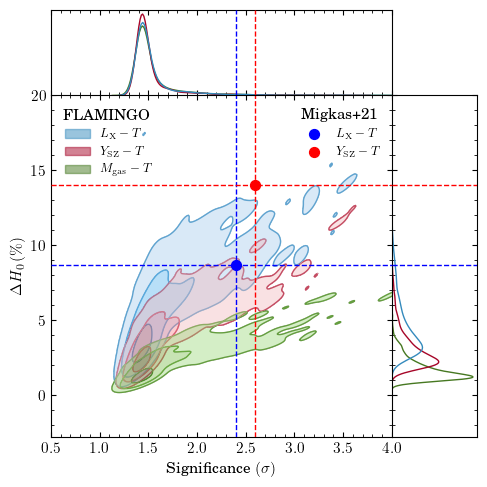

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')

# set y lim manually. The ylim argument in jointgrid stretch the histogram
data = data[data['$\\Delta H_0\\,(\\%)$'] < 25]  

colors = ['#348ABD', '#A60628', '#467821']
sns.set_palette(colors)
# Create the 2D KDE plot
g = sns.JointGrid(data=data, 
                    x='Significance $(\\sigma)$',
                    y='$\\Delta H_0\\,(\\%)$', 
                    hue='Relations',
                    space=0,
                    ratio=4,
                    # marginal_ticks=True,
                    height=5,
                    # dpi=300
                    xlim=(0.5, 4.0),
                    ylim=(-2.8, 20),
                    )

# kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
for relation, color in zip(['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$'], 
                            colors):
    
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance $(\\sigma)$',
                y='$\\Delta H_0\\,(\\%)$', 
                #hue='Relations',
                color=color,
                fill=False, 
                levels=(0.003, 0.05, 0.32, 1), # levels=(0.011, 0.14, 0.61, 1.),
                #bw_adjust=4.5, # 3.2,
                zorder=1,
                ax=g.ax_joint
                )
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance $(\\sigma)$',
                y='$\\Delta H_0\\,(\\%)$', 
                #hue='Relations',
                color=color,
                fill=True, 
                levels=(0.003, 0.05, 0.32, 1), # levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                #bw_adjust=4.5, # 3.2,
                zorder=2,
                alpha=0.4,
                ax=g.ax_joint,
                )

# plot marginal plots
g.plot_marginals(sns.kdeplot,
                fill=False
                )

# M21 results
x_point = 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle='--', color='b', zorder=3)
line0 = g.ax_joint.scatter(x_point, y_point, marker='o', color='b', s=50, linewidths=1 ,label='$L_\\mathrm{{X}}-T$', zorder=10)
#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

x_point = 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
line1 = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, linewidths=1 ,label='$Y_\\mathrm{{SZ}}-T$', zorder=10)
#g.ax_joint.axhspan(ymin=14.0-3.4, ymax=14.0+3.4, color='tab:orange', alpha=0.2, zorder=0)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor='#348ABD', edgecolor='#348ABD', label='$L_\\mathrm{X}-T$', alpha=0.5),
                           Patch(facecolor='#A60628', edgecolor='#A60628', label='$Y_\\mathrm{SZ}-T$', alpha=0.5),
                           Patch(facecolor='#467821', edgecolor='#467821', label='$M_\\mathrm{gas}-T$', alpha=0.5)]

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

# plt.savefig('./to_paper/h0mc_hist_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()

## Integrate inside the isodensity curves 

In [1]:
# Read data
import pandas as pd
data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_all.csv')
data

,Unnamed: 0,"$\Delta H_0\,(\%)$",Significance $(\sigma)$,Relations
0,0,10.295630,1.922735,$L_\mathrm{{X}}-T$
1,1,4.899787,1.522564,$L_\mathrm{{X}}-T$
2,2,5.149678,1.492285,$L_\mathrm{{X}}-T$
3,3,4.808609,1.526515,$L_\mathrm{{X}}-T$
4,4,7.142180,1.535062,$L_\mathrm{{X}}-T$
...,...,...,...,...
5179,5179,1.017320,1.437845,$M_\mathrm{{gas}}-T$
5180,5180,1.173855,1.431109,$M_\mathrm{{gas}}-T$
5181,5181,1.281169,1.415019,$M_\mathrm{{gas}}-T$
5182,5182,2.818736,1.661044,$M_\mathrm{{gas}}-T$


First an intuitive understanding of the distribution of the points

In [ ]:
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['$\Delta H_0\,(\%)$', 'Significance $(\\sigma)$']]
column_name = ['$\Delta H_0\,(\%)$', 'Significance $(\\sigma)$']

print(len(dataset))
print(np.sum(dataset[column_name[0]] > 8.7))
print(np.sum(dataset[column_name[1]] > 2.4))
print(np.sum((dataset[column_name[0]] > 8.7) & (dataset[column_name[1]] > 2.4)))

1724
96
42
33


## Integrate the KDEs

In [ ]:
# Ysz-T
dataset = data[data['Relations']=='$Y_\\mathrm{{SZ}}-T$'][['$\Delta H_0\,(\%)$', 'Significance $(\\sigma)$']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-20, 40, 500) # delta H0
y_grid = np.linspace(-10, 20, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([14, 2.6])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print('p-value =',1 - prob_above)

(2, 1728)
(500, 500)
1.0000000000001623
1.0000000000001623 1.850079489701466e-43
-1.6231460620019789e-13


In [5]:
# Lx-T
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['$\Delta H_0\,(\%)$', 'Significance $(\\sigma)$']]

import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500) # delta H0
y_grid = np.linspace(-10, 20, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([8.7, 2.4])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print('p-value =', 1 - prob_above)

(2, 1728)
(500, 500)
1.0000000000000075
0.9450936624386092 0.0549063375613984
p-value = 0.05490633756139085


In [ ]:
# solve for 1 sigma
n_sigma = 1
p = np.exp(-n_sigma**2*0.5)
print(p)

0.6065306597126334


In [ ]:
# given p, find the n_sigma
p = np.array([0.05917819788745993, 2.1366893399044073e-07])
n_sigma = np.sqrt(-2*np.log(p))
print(n_sigma)

[2.37789911 5.54235294]


In [29]:
np.sqrt(-2*np.log(0.0036))

3.35464496885142

## The Mahal.. distance

In [23]:
# Importing libraries 

import numpy as np 
import pandas as pd 
import scipy as stats 
from scipy.stats import chi2 

df = data[data['Relations'] == '$Y_\mathrm{{SZ}}-T$']

# calculateMahalanobis Function to calculate 
# the Mahalanobis distance 
def calculateMahalanobis(y=None, data=None, cov=None): 

	y_mu = y - np.mean(data, axis=0) 
	if not cov: 
		cov = np.cov(data.values.T) 
	inv_covmat = np.linalg.inv(cov) 
	left = np.dot(y_mu, inv_covmat) 
	mahal = np.dot(left, y_mu.T) 
	return mahal 

# Creating a new column in the dataframe that holds 
# the Mahalanobis distance for each row 
distance2 = calculateMahalanobis(y=np.array([14, 2.6]), data=df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']])
print(distance2**0.5)

8.155155869125982


In [27]:
from scipy.stats import genpareto
import numpy as np
import pandas as pd

df = data[data['Relations'] == '$Y_\mathrm{{SZ}}-T$']

# Define center as the mean of the data
center = df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].mean().values
target_point = np.array([14, 2.6])

# Calculate the Euclidean distance of the target point to the center
new_point_distance = np.linalg.norm(target_point - center)

# Calculate distances of all points in the dataset to the center
distances = np.linalg.norm(df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].values - center, axis=1)

# Set a high threshold for fitting, such as the 95th percentile
threshold = np.percentile(distances, 95)
exceedances = distances[distances > threshold] - threshold  # Focus on the tail (exceedances above threshold)

# Fit a Generalized Pareto Distribution (GPD) to the exceedances
params = genpareto.fit(exceedances)

# Calculate the distance of the target point to the center and its exceedance
new_point_exceedance = new_point_distance - threshold
# Estimate the probability of seeing a distance as extreme as the target point
p_value_evt = 1 - genpareto.cdf(new_point_exceedance, *params)
print("EVT-based p-value:", p_value_evt)

from scipy.stats import chi2

# Calculate the covariance matrix and mean of the data
cov_matrix = np.cov(df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].values.T)
mean_vector = center

# Calculate the Mahalanobis distance squared for the target point
delta = target_point - mean_vector
mahalanobis_dist_sq = np.dot(delta.T, np.linalg.inv(cov_matrix)).dot(delta)

# Calculate the p-value based on the chi-squared distribution with 2 degrees of freedom
p_value_mahalanobis = 1 - chi2.cdf(mahalanobis_dist_sq, df=2)
print("Mahalanobis-based p-value:", p_value_mahalanobis)


EVT-based p-value: 0.0036347067729071147
Mahalanobis-based p-value: 3.6637359812630166e-15


In [28]:
mahalanobis_dist_sq**0.5

8.155155869125982

In [7]:
# Importing libraries 

import numpy as np 
import pandas as pd 
import scipy as stats 
from scipy.stats import chi2 

df = data[data['Relations'] == '$L_\mathrm{{X}}-T$']

# calculateMahalanobis Function to calculate 
# the Mahalanobis distance 
def calculateMahalanobis(y=None, data=None, cov=None): 

	y_mu = y - np.mean(data, axis=0) 
	if not cov: 
		cov = np.cov(data.values.T) 
	inv_covmat = np.linalg.inv(cov) 
	left = np.dot(y_mu, inv_covmat) 
	mahal = np.dot(left, y_mu.T) 
	return mahal 

# Creating a new column in the dataframe that holds 
# the Mahalanobis distance for each row 
distance2 = calculateMahalanobis(y=np.array([8.7, 2.4]).T, data=df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']])
print(distance2**0.5)

3.31716578163515


## Projection Persuit

In [4]:
import numpy as np

df = data[data['Relations'] == '$Y_\mathrm{{SZ}}-T$']

# Calculate the mean or median of the dataset
center = df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].mean().values  # Use median if needed

# Define the direction vector
target_point = np.array([14, 2.6])
direction_vector = target_point - center
direction_vector /= np.linalg.norm(direction_vector)  # Normalize the direction vector

# Project all points onto the direction vector
data_points = df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].values
projections = np.dot(data_points - center, direction_vector)

# Project the target point onto the direction vector
target_projection = np.dot(target_point - center, direction_vector)

# Calculate the mean and standard deviation of the projections
mean_proj = np.mean(projections)
std_proj = np.std(projections)

# Compute the number of sigma deviations for the target point
sigma_deviation = (target_projection - mean_proj) / std_proj
print(f"Number of sigma standard deviations: {sigma_deviation}")


# The deviation from +34 percentile?
median_proj = np.median(projections)
sigma_proj = np.percentile(projections, 84) - median_proj

# Number of sigma deviation
sigma_deviation = (target_projection - median_proj) / sigma_proj
print(f'Number of sigma 34th percentiles deviation: {sigma_deviation}')

Number of sigma standard deviations: 7.44589534947656
Number of sigma 34th percentiles deviation: 6.717667710229379


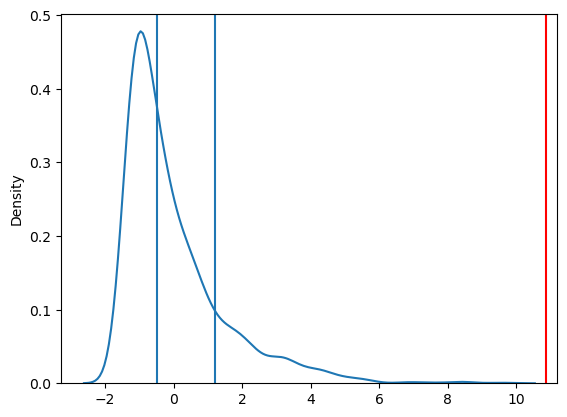

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(projections)
plt.axvline(median_proj)
plt.axvline(median_proj + sigma_proj)
plt.axvline(target_projection, color='r')
plt.show()

KDE peak (mode): [2.110063583689919, 1.4214719713024129]
22.04861111111111
Number of sigma deviations: 15.205814074711148


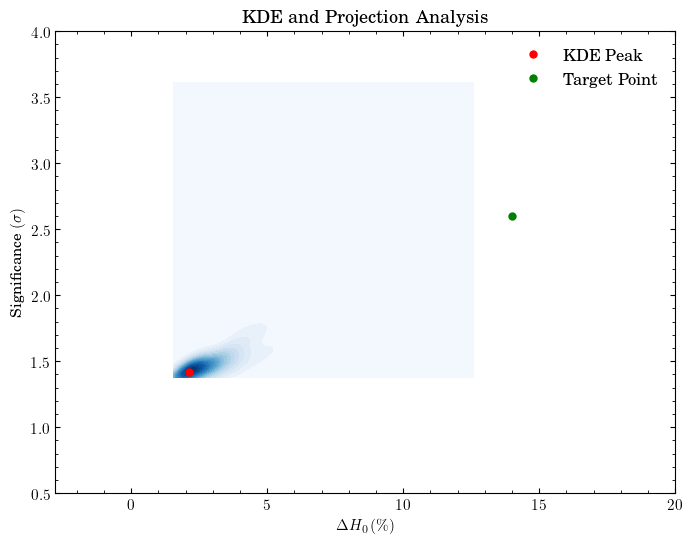

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_mc_all.csv')
df = data[data['Relations'] == '$Y_\mathrm{{SZ}}-T$']

# Extract the data
data_array = df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].values.T

# Fit the KDE
kde = gaussian_kde(data_array)

# Create a grid for evaluation
x_min, x_max = data_array[0].min(), data_array[0].max()
y_min, y_max = data_array[1].min(), data_array[1].max()
x_grid, y_grid = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Evaluate the KDE on the grid
positions = np.vstack([x_mesh.ravel(), y_mesh.ravel()])
kde_values = kde(positions).reshape(x_mesh.shape)

# Find the grid point with the maximum KDE value (KDE peak)
max_idx = np.unravel_index(np.argmax(kde_values), kde_values.shape)
kde_peak = [x_grid[max_idx[1]], y_grid[max_idx[0]]]
print(f"KDE peak (mode): {kde_peak}")

# Define the target point
target_point = np.array([14, 2.6])

# Compute the direction vector from the KDE peak to the target point
direction_vector = target_point - kde_peak
direction_vector /= np.linalg.norm(direction_vector)  # Normalize the direction vector

# Project all data points onto the direction vector
data_points = df[['$\Delta H_0\,(\%)$', 'Significance $(\sigma)$']].values
projections = np.dot(data_points - kde_peak, direction_vector)

# Center the projections so that the KDE peak corresponds to zero
# (Already centered since we subtracted kde_peak)

# Project the target point onto the direction vector
target_projection = np.dot(target_point - kde_peak, direction_vector)

# Compute the standard deviation using the +34th percentile from the KDE peak
kde_peak_percentile = np.sum(projections <= 0) / len(projections) * 100
std_proj = np.percentile(projections, kde_peak_percentile + 34)
print(kde_peak_percentile)

# Note: Since the KDE peak is at zero, the 50th percentile of the projections is approximately zero

# Compute the number of sigma deviations for the target point
sigma_deviation = (target_projection) / std_proj
print(f"Number of sigma deviations: {sigma_deviation}")


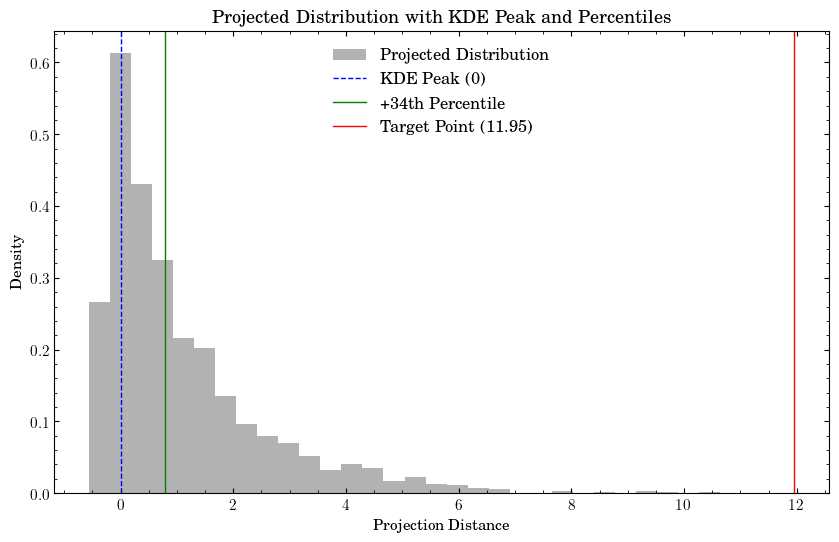

In [31]:
# Visualization of the projected distribution
plt.figure(figsize=(10, 6))
plt.style.use('./nice.mplstyle')

# Plot the histogram of projections
plt.hist(projections, bins=30, density=True, alpha=0.6, color='gray', label='Projected Distribution')

# Mark the KDE peak projection
plt.axvline(0, color='blue', linestyle='--', label='KDE Peak (0)')

# Mark the ±34th percentiles
plt.axvline(std_proj, color='green', linestyle='-', label='+34th Percentile')
# plt.axvline(-std_proj, color='green', linestyle='-', label='-34th Percentile')

# Mark the target projection
plt.axvline(target_projection, color='red', linestyle='-', label=f'Target Point ({target_projection:.2f})')

# Add labels and legend
plt.xlabel('Projection Distance')
plt.ylabel('Density')
plt.title('Projected Distribution with KDE Peak and Percentiles')
plt.legend()
plt.show()

In [58]:
from scipy.stats import genpareto

# Set threshold (e.g., 95th percentile)
threshold = np.percentile(projections, 70)
exceedances = projections[projections > threshold] - threshold

# Fit GPD to exceedances
params = genpareto.fit(exceedances)

# Compute exceedance probability of the target projection
if target_projection > threshold:
    p_value_evt = 1 - genpareto.cdf(target_projection - threshold, *params)
else:
    p_value_evt = 1.0  # Target point not in tail
print(f"EVT-based p-value: {p_value_evt}")


EVT-based p-value: 0.0005163613044514292


EVT-based p-value: 0.0002369448564852883


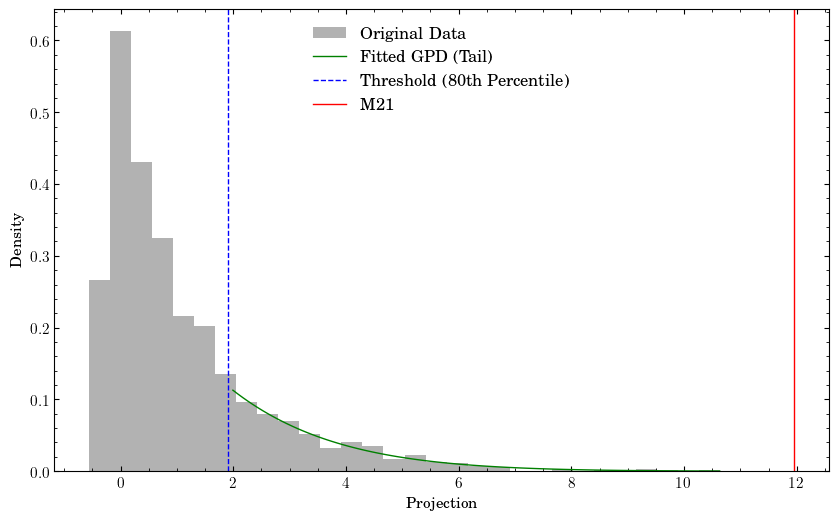

In [78]:
# Set a high threshold (e.g., 95th percentile)
percentile = 80
threshold = np.percentile(projections, percentile)
exceedances = projections[projections > threshold] - threshold  # Calculate excesses over the threshold

# Fit the Generalized Pareto Distribution (GPD)
params = genpareto.fit(exceedances)
shape, loc, scale = params

# Compute exceedance probability of the target projection
if target_projection > threshold:
    p_value_evt = 1 - genpareto.cdf(target_projection - threshold, *params)
else:
    p_value_evt = 1.0  # Target point not in tail
print(f"EVT-based p-value: {p_value_evt}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot histogram of the entire projections
plt.hist(projections, bins=30, density=True, alpha=0.6, color='gray', label='Original Data')

# Plot fitted GPD for the tail
x_vals = np.linspace(threshold, projections.max(), 100)
gpd_pdf = genpareto.pdf(x_vals - threshold, shape, loc, scale) * (1 - percentile/100)
plt.plot(x_vals[1:], gpd_pdf[1:], color='g', label='Fitted GPD (Tail)')

# Mark threshold
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold ({percentile}th Percentile)')

# Mark the target projection
plt.axvline(target_projection, color='red', linestyle='-', label=f'M21')

# Add labels and legend
plt.xlabel('Projection')
plt.ylabel('Density')
plt.legend()
plt.show()

In [69]:
from scipy.stats import kstest

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(exceedances, 'genpareto', args=params)
print(f"K-S Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4e}")


K-S Statistic: 0.0293, p-value: 9.1992e-01
